<a href="https://colab.research.google.com/github/hyehyunseo/ESAA_OB/blob/main/1120_%EB%94%A5%EB%9F%AC%EB%8B%9D_ch3_4%2C6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[개념 정리]**
**11/20(월) 과제 - 파이썬 딥러닝 텐서플로 ch3. 4, 6 ~ 7 pg. 87 ~ 95, 105 ~ 115를 필사**

---

## **04. 모델 세부 설정**

In [1]:
import tensorflow as tf

#케라스의 내장 데이터셋에서 mnist 데이터 로드
mnist=tf.keras.datasets.mnist

#load_data()로 데이터 로드
(x_train, y_train), (x_test, y_test)=mnist.load_data()

#로드된 데이터셋 확인
print('train set:', x_train.shape, y_train.shape)
print('test set:', x_test.shape, y_test.shape)

#데이터 정규화
x_train=x_train/x_train.max()
x_test=x_test/x_test.max()

11490434/11490434 [==============================] - 1s 0us/step
train set: (60000, 28, 28) (60000,)
test set: (10000, 28, 28) (10000,)


### **4-1. 초기값 설정**

레이어의 초기화 방법을 다르게 설정할 수 있다.

Dense 레이어는 기본 초기화 방법으로 Glorot Uniform 초기화 방법이 설정되어 있다.

In [2]:
dense=tf.keras.layers.Dense(256, activation='relu')
dense.get_config()['kernel_initializer']

{'module': 'keras.initializers',
 'class_name': 'GlorotUniform',
 'config': {'seed': None},
 'registered_name': None}

=> 기본 값으로 설정된 Glorot Uniform 초기화 방법을 HeNormal로 변경하기 위해서는 kernel_initializer 매개 변수에 설정한다.

In [3]:
#문자열 초기화
dense=tf.keras.layers.Dense(256, kernel_initializer='he_normal', activation='relu')
print(dense.get_config()['kernel_initializer'])

#클래스 인스턴스 초기화
he_normal=tf.keras.initializers.HeNormal()
dense=tf.keras.layers.Dense(256, kernel_initializer=he_normal, activation='relu')
print(dense.get_config()['kernel_initializer'])

{'module': 'keras.initializers', 'class_name': 'HeNormal', 'config': {'seed': None}, 'registered_name': None}
{'module': 'keras.initializers', 'class_name': 'HeNormal', 'config': {'seed': None}, 'registered_name': None}


[케라스에서 지원하는 자주 사용되는 최기화 목록]
* glorot_normal / glorot_uniform : 글로럿 초기화

* lecun_normal / lecun_uniform : Yann Lecun 초기화

* he_normal / he_uniform: He초기화

* random_normal / random_uniform : 정규 분포

### **4-2. 규제**

모델의 과대적합을 해소하기 위해 L1, L2 규제를 적용하기도 한다.

텐서플로 케라스 레이어는 기본값으로 규제를 적용하지 않기 때문에, 레이어에 규제를 적용하기 위해서는 별도로 설정해 주어야한다.

In [4]:
#기본값
dense=tf.keras.layers.Dense(256, activation='relu')
dense.get_config()

{'name': 'dense_3',
 'trainable': True,
 'dtype': 'float32',
 'units': 256,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'module': 'keras.initializers',
  'class_name': 'GlorotUniform',
  'config': {'seed': None},
  'registered_name': None},
 'bias_initializer': {'module': 'keras.initializers',
  'class_name': 'Zeros',
  'config': {},
  'registered_name': None},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

[케라스에서 지원하는 규제]

* L1 규제
* L2 규제

In [5]:
#L1 규제 적용
dense=tf.keras.layers.Dense(256, kernel_regularizer='l1', activation='relu')
print(dense.get_config()['kernel_regularizer'])

#클래스 인스턴스 적용, alpha=0.1 변경
regularizer=tf.keras.regularizers.l1(l1=0.1)
dense=tf.keras.layers.Dense(256, kernel_regularizer=regularizer, activation='relu')
print(dense.get_config()['kernel_regularizer'])

{'module': 'keras.regularizers', 'class_name': 'L1', 'config': {'l1': 0.009999999776482582}, 'registered_name': None}
{'module': 'keras.regularizers', 'class_name': 'L1', 'config': {'l1': 0.10000000149011612}, 'registered_name': None}


### **4-3. 드롭아웃**

딥러닝 모델의 층이 넓고 깊어질 때 모델은 훈련에 주어진 샘플에 과하게 적합하도록 학습하는 경향이 있다. 따라서, 훈련할 때 만나지 못한 새로운 데이터에 대해서는 좋지 않은 예측력을 보일 때가 많다.

=> 드롭아웃은 모델의 과대적합 문제를 해결하기 위해 제안된 아이디어이며, 실무적으로 상당히 좋은 효과를 보인다.

* 노드의 일부 신호를 임의로 삭제하여 모델이 쉽게 과대적합 되는 것을 방지할 수 있다. 모델이 학습하는 가중치 파라미터의 개수가 현저하게 줄어들기 때문이다.
* 중요한 점은 모델이 훈련할 때는 드롭아웃이 적용되어 노드 중 일부만 훈련하게 되지만,예측 시점에는 모든 노드들이 활용된다.

In [6]:
#dropout 25% 비율 적용 (25% 노드가 삭제)
tf.keras.layers.Dropout(0.25)

### **4-4. 배치 정규화**

배치 정규화는 각 층에서 활성화 함수를 통과하기 전 미니 배치의 스케일을 정규화한다. 다음 층으로 데이터가 전달되기 전에 스케일을 조정하기 때문에 보다 안정적인 훈련이 가능하고, 성능을 크게 향상시킬 수 있다.

In [7]:
#model A: Dense+ReLu
model_a=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_a.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
#model B: Dense+BatchNorm+ReLU
model_b=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64),
    #여기서 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    #배치 정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(32),
    #배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    #배치 정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(10, activation='softmax')
])

model_b.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                50240     
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                     

### **4-5. 활성화 함수**

활성화 함수를 적용할 때, 다음과 같이 클래스 인스턴스로 선하여 하이퍼파라미터 값을 변경하여 적용할 수 있다.

In [9]:
#LeakyReLU 기본 설정
tf.keras.layers.LeakyReLU()

#LeakyReLU, alpha=0.2로 변경
tf.keras.layers.LeakyReLU(alpha=0.2)

In [10]:
#model C: Dense+BatchNorm+LeakyReLU(0,2)
model_c=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64),
    #여기서 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    #배치 정규화 후 활성화 함수 (LeakyReLU, alpha=0.2) 적용
    tf.keras.layers.LeakyReLU(alpha=0.2),

    tf.keras.layers.Dense(32),
    #배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    #배치 정규화 후 활성화 함수 적용
    tf.keras.layers.LeakyReLU(alpha=0.2),

    tf.keras.layers.Dense(10, activation='softmax')
])

model_c.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_2 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_3 (Bat  (None, 32)                128       
 chNormalization)                                     

* model a: Dense 레이어 + ReLU 활성화 함수
* model b : Dense 레이어 + 배치 정규화
* model c : Dense 레이어 + 배치 정규화 + LeakyReLU 활성화 함수

In [11]:
model_a.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_b.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_c.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Model A : Dense + ReLU
history_a=model_a.fit(x_train, y_train,
                      validation_data=(x_test, y_test), epochs=10)
#Model B : Dense + BatchNorm + ReLU
history_b=model_b.fit(x_train, y_train,
                      validation_data=(x_test, y_test), epochs=10)
#Model C : Dense + BatchNorm + LeakyReLU(0,2)
history_c=model_c.fit(x_train, y_train,
                      validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3022 - accuracy: 0.9116 - val_loss: 0.1670 - val_accuracy: 0.9502
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1355 - accuracy: 0.9600 - val_loss: 0.1332 - val_accuracy: 0.9598
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0987 - accuracy: 0.9703 - val_loss: 0.1082 - val_accuracy: 0.9669
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0773 - accuracy: 0.9766 - val_loss: 0.0943 - val_accuracy: 0.9700
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0646 - accuracy: 0.9798 - val_loss: 0.0969 - val_accuracy: 0.9704
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0535 - accuracy: 0.9824 - val_loss: 0.0848 - val_accuracy: 0.9743
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0453 - accuracy: 0.9856 - val_loss: 0.0968 - val_accura

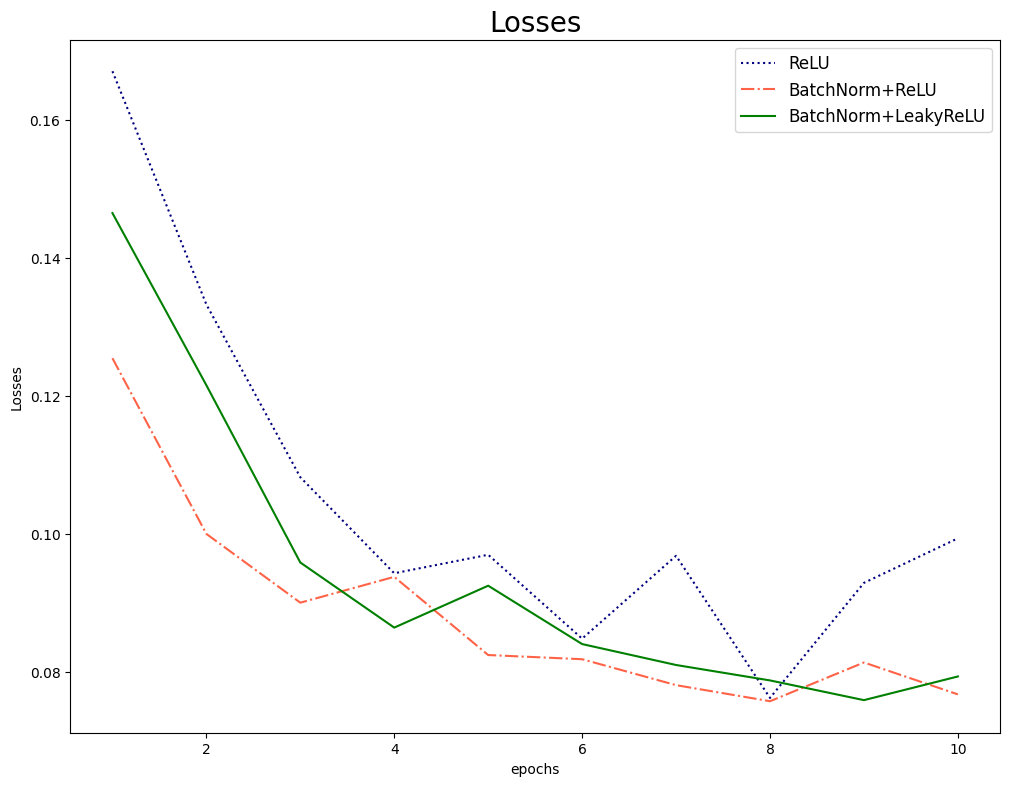

In [12]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 9))
plt.plot(np.arange(1, 11), history_a.history['val_loss'], color='navy', linestyle=':')
plt.plot(np.arange(1, 11), history_b.history['val_loss'], color='tomato', linestyle='-.')
plt.plot(np.arange(1, 11), history_c.history['val_loss'], color='green', linestyle='-')

plt.title('Losses', fontsize=20)
plt.xlabel('epochs')
plt.ylabel('Losses')
plt.legend(['ReLU', 'BatchNorm+ReLU', 'BatchNorm+LeakyReLU'], fontsize=12)
plt.show()

=> 실행 결과를 보면 mnist 데이터셋은 모델별 차이가 크지는 않다.

## **06. 모델 저장 및 불러오기**

### **6-1. 모델을 파일로 저장**

훈련을 종료하여 가중치가 업데이트된 모델 인스턴스를 저장할 수 있다.
* save() 메소드를 사용하는데, save() 메소드를 호출할 때 저장할 파일의 디렉토리를 포함하는 파일명을 매개변수로 지정한다.
* 모델을 저장하는 형식은 HDF5 포맷과 SavedModel 포맷 두가지가 있다.

In [14]:
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [15]:
#모델명을 h5 포맷으로 저장
model_b.save('/content/mydrive/MyDrive/ESAA/OB/data/h5-model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### **6-2. 저장된 모델 복원**

In [16]:
#모델 복원
h5_model=tf.keras.models.load_model('/content/mydrive/MyDrive/ESAA/OB/data/h5-model.h5')
h5_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                50240     
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                     

* 검증 셋을 evaluate 함수에 대입해 손실 함수와 평가지표를 계산한다.

In [17]:
# 모델 검증
loss, acc=h5_model.evaluate(x_test, y_test, verbose=0)
print(f'h5_model] loss: {loss:.5f}, acc: {acc:.5f}')

h5_model] loss: 0.07669, acc: 0.97630


In [18]:
# 모델을 SavedModel 포맷으로 저장
model_b.save('/content/mydrive/MyDrive/ESAA/OB/data/saved-model')

In [19]:
#모델 복원
saved_model=tf.keras.models.load_model('/content/mydrive/MyDrive/ESAA/OB/data/saved-model')
saved_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                50240     
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                     

In [20]:
#모델 검증 (HDF5 포맷)
loss, acc=h5_model.evaluate(x_test, y_test, verbose=0)
print(f'h5_model] loss: {loss:.5f}, acc: {acc:.5f}')

#모델 검증 (SavedModel 포맷)
loss, acc=saved_model.evaluate(x_test, y_test, verbose= 0)
print(f'saved_model] loss: {loss:.5f}, acc: {acc:.5f}')

h5_model] loss: 0.07669, acc: 0.97630
saved_model] loss: 0.07669, acc: 0.97630


=> SavedModel 형식으로 저장 및 복원된 모델의 성능을 확인하면, HDF5 형식으로 저장 및 복원된 모델과 동일한 성능을 나타낸다.

## **07. 복잡한 모델 생성**

### **7-1. 함수형 API**

함수 형태로 딥러닝 모델을 정의하면, 다양한 모델 구조를 구현할 수 있다. 여러 층을시퀀스 형태로 연결하는 Sequential API와 다르게, Functional API는 복잡한 구조의 모델을 정의할 수 있다.



* Sequential API로 구현한 mnist 분류기 모델을 함수형 API로 동일하게 구현한 코드
* Input 레이어 정의

In [21]:
import tensorflow as tf

#모델의 레이어를 체인 구조로 연결 input 레이어 정의
input_layer=tf.keras.Input(shape=(28, 28), name='InputLayer')

#모델의 레이어를 체인 구조로 연결
x1=tf.keras.layers.Flatten(name='Flatten')(input_layer)
x2=tf.keras.layers.Dense(256, activation='relu', name='Dense1')(x1)
x3=tf.keras.layers.Dense(64, activation='relu', name='Dense2')(x2)
x4=tf.keras.layers.Dense(10, activation='softmax', name='OutputLayer')(x3)

* 레이어마다 name 매개변수로 이름을 부여할 수 있다.

In [22]:
#모델 생성
func_model=tf.keras.Model(inputs=input_layer, outputs=x4, name='FunctionalModel')

#모델 요약
func_model.summary() #name 위에 설정하면 summary에 출력됨

Model: "FunctionalModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 28, 28)]          0         
                                                                 
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 Dense1 (Dense)              (None, 256)               200960    
                                                                 
 Dense2 (Dense)              (None, 64)                16448     
                                                                 
 OutputLayer (Dense)         (None, 10)                650       
                                                                 
Total params: 218058 (851.79 KB)
Trainable params: 218058 (851.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* 모델의 구조도 시각화

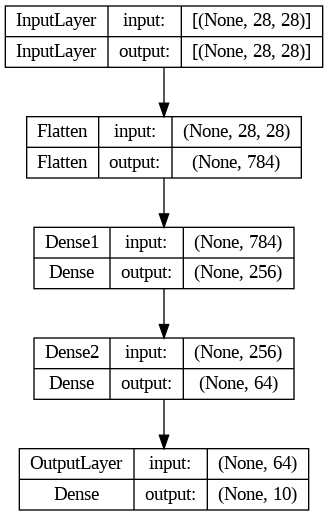

In [23]:
from tensorflow.keras.utils import plot_model

#구조도 시각화
plot_model(func_model, show_shapes=True, show_layer_names=True, to_file='model.png')

=> plot_model()에 모델을 지정하면 구조도가 출력된다.

* 함수형 API로 생성한 모델도 Sequential API로 생성한 모델과 동일한 방식으로 훈련할 수 있다.

In [24]:
#컴파일
func_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#훈련
func_model.fit(x_train, y_train, epochs=3)

#검증
loss, acc=func_model.evaluate(x_test, y_test, verbose=0)
print(f'Functional Model] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 17s 8ms/step - loss: 0.2126 - accuracy: 0.9380
Epoch 2/3
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0877 - accuracy: 0.9734
Epoch 3/3
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0615 - accuracy: 0.9808
Functional Model] loss: 0.09748, acc: 0.97000


### **7-2. 모델 서브클래싱**

텐서틀로 케라스는 Model 클래스를 제공하고 이를 기반으로 딥러닝 모델을 구현하고 있다. 이 클래스는 직접 상속받아 사용자가 직접 서브 클래스로 딥러닝 모델을 만들 수도 있다.

* Model Subclassing으로 모델 인스턴스를 생성하기 위해서는 tf.keras.Model을 상속받아 생성하고자 하는 모델 클래스를 구현한다.

In [25]:
class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel, self).__init__()
    #초기값 설정
    self.flatten=tf.keras.layers.Flatten()
    self.dense1=tf.keras.layers.Dense(256, activation='relu')
    self.dense2=tf.keras.layers.Dense(64, activation='relu')
    self.dense3=tf.keras.layers.Dense(10, activation='softmax')

  #method overiding
  #훈련용 함수 정의
  #x는 input
  def call(self, x):
    x=self.flatten(x)
    x=self.dense1(x)
    x=self.dense2(x)
    x=self.dense3(x)
    return x

=> call 함수를 메소드 오버라이딩으로 구현한다. call() 메소드는 fit() 메소드가 호출되어 훈련하는 경우 호출될 함수다.

In [26]:
#모델 생성
mymodel=MyModel()

#모델의 이름 설정
mymodel._name='subclass_model'

#모델 input 정의
mymodel(tf.keras.layers.Input(shape=(28, 28)))

#모델 요약
mymodel.summary()

Model: "subclass_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         multiple                  0         
                                                                 
 dense_15 (Dense)            multiple                  200960    
                                                                 
 dense_16 (Dense)            multiple                  16448     
                                                                 
 dense_17 (Dense)            multiple                  650       
                                                                 
Total params: 218058 (851.79 KB)
Trainable params: 218058 (851.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* tf.keras.Model을 상속받아 구현한 모델인 MyModel을 생성자로 인스턴스를 생성한다. 모델에 이름을 부여하고 싶다면 모델 인스턴스의 _name에 이름을 지정한다.
* 생성자로 객체를 생성해 저장한 mymodel 변수에 바로 summary()로 요약 출력하는 것은 불가는 하다. input_shape이 정의되지 않았기 때문에 전체 모델의 구조를 생성해내지 못하기 때문이다.

In [27]:
#컴파일
mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#훈련
mymodel.fit(x_train, y_train, epochs=3)

#검증
loss, acc=mymodel.evaluate(x_test, y_test, verbose=0)
print(f'Subclassing Model] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 13s 6ms/step - loss: 0.2067 - accuracy: 0.9385
Epoch 2/3
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0865 - accuracy: 0.9743
Epoch 3/3
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0610 - accuracy: 0.9808
Subclassing Model] loss: 0.07999, acc: 0.97680


### **7-3. 서브클래싱 모델 파라미터를 활용한 생성**

Model Subclassing으로 생성하는 장점은 생성자 파라미터로 모델 내부 레이어의 하이퍼파라미터를 지정할 수 있다는 점이다.

* 모델의 생성자 파라미터를 추가해 동적으로 레이어의 유닛 개수를 초기화하는 예제

In [29]:
class MyModel(tf.keras.Model):

  #생성자 파라미터 추가
  def __init__(self, units, num_classes):
    super(MyModel, self).__init__()
    #초기값 설정
    self.flatten=tf.keras.layers.Flatten()
    self.dense1=tf.keras.layers.Dense(units, activation='relu')
    self.dense2=tf.keras.layers.Dense(units/4, activation='relu')
    self.dense3=tf.keras.layers.Dense(num_classes, activation='softmax')

  #class overiding
  #훈련용 함수 정의
  #x는 input
  def call(self, x):
    x=self.flatten(x)
    x=self.dense1(x)
    x=self.dense2(x)
    x=self.dense3(x)
    return x

* 모델의 생성자 파라미터로 기준이 되는 unit의 개수를 입력받아 Dense 레이어의 유닛 개수를 계산하여 설정

In [30]:
#모델 생성
mymodel=MyModel(256, 10)

#모델 input 정의
mymodel(tf.keras.layers.Input(shape=(28, 28)))

#모델 요약
mymodel.summary()

Model: "my_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         multiple                  0         
                                                                 
 dense_18 (Dense)            multiple                  200960    
                                                                 
 dense_19 (Dense)            multiple                  16448     
                                                                 
 dense_20 (Dense)            multiple                  650       
                                                                 
Total params: 218058 (851.79 KB)
Trainable params: 218058 (851.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* summary()로 요약한 결과를 확인해보면 동적으로 설정한 레이어의 파라미터가 초기화되었음을 알 수 있다.

In [31]:
#컴파일
mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#훈련
mymodel.fit(x_train, y_train, epochs=3)

#검증
loss, acc=mymodel.evaluate(x_test, y_test, verbose=0)
print(f'Subclassing Model w.parameters] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 15s 7ms/step - loss: 0.2116 - accuracy: 0.9376
Epoch 2/3
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0889 - accuracy: 0.9735
Epoch 3/3
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0606 - accuracy: 0.9812
Subclassing Model w.parameters] loss: 0.09074, acc: 0.97060
